# Downsampling


In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.preprocessing import *

%matplotlib inline 
train = pd.read_csv('/home/abhi/Desktop/trainData.csv')

train_majority = train[train.Class==0]
train_minority = train[train.Class==1]
 
# Upsample minority class
train_majority_downsampled = resample(train_majority, 
                                 replace=False,     # sample with replacement|
                                 n_samples=6000   # to match majority class
                                 ) # reproducible results
 
# Combine majority class with upsampled minority class
train_downsampled = pd.concat([train_majority_downsampled, train_minority])
 
# Display new class counts

train =train_downsampled
print train.Class.value_counts()
train.head()

1    2784
0    2500
Name: Class, dtype: int64


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Class
12767,42,blue-collar,divorced,basic.4y,no,no,no,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0
17867,42,admin.,married,basic.9y,unknown,no,no,telephone,jul,tue,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
1018,31,admin.,married,university.degree,no,yes,no,cellular,aug,mon,4,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
3219,35,admin.,single,high.school,no,no,no,cellular,jul,fri,12,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
19755,33,services,married,basic.6y,no,yes,no,telephone,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0


# Converting Categorical data to numerical values

In [121]:


job = pd.get_dummies(train['job'], drop_first = True)
marital = pd.get_dummies(train['marital'],drop_first = True)
education = pd.get_dummies(train['education'], drop_first = True)
default = pd.get_dummies(train['default'], drop_first = True)
housing = pd.get_dummies(train['housing'], drop_first = True)
loan = pd.get_dummies(train['loan'], drop_first = True)
contact = pd.get_dummies(train['contact'], drop_first = True)
month = pd.get_dummies(train['month'], drop_first = True)
day_of_week = pd.get_dummies(train['day_of_week'], drop_first = True)
poutcome = pd.get_dummies(train['poutcome'], drop_first = True)

train.drop(['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'], axis =1, inplace = True)

train = pd.concat([train,job,marital,education,loan,housing,contact,month],axis = 1)

train.head()





,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Class,...,telephone,aug,dec,jul,jun,mar,may,nov,oct,sep
12767,42,1,999,0,1.1,93.994,-36.4,4.858,5191.0,0,...,1,0,0,0,0,0,1,0,0,0
17867,42,1,999,0,1.4,93.918,-42.7,4.961,5228.1,0,...,1,0,0,1,0,0,0,0,0,0
1018,31,4,999,0,1.4,93.444,-36.1,4.963,5228.1,0,...,0,1,0,0,0,0,0,0,0,0
3219,35,12,999,0,1.4,93.918,-42.7,4.962,5228.1,0,...,0,0,0,1,0,0,0,0,0,0
19755,33,1,999,0,1.1,93.994,-36.4,4.860,5191.0,0,...,1,0,0,0,0,0,1,0,0,0


# Using stratified k fold

In [122]:
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import StratifiedKFold
kf=StratifiedKFold(n_splits=10, shuffle=True, random_state=False)
train1=train.drop('Class', axis = 1)
labels=train['Class']

0.779789409763
0.761985611511


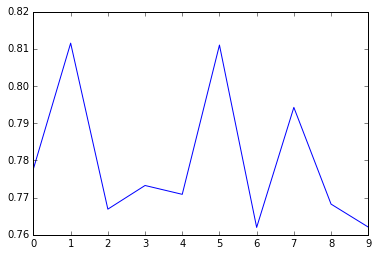

In [123]:


from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(max_depth=12,max_leaf_nodes=35,min_samples_split=300,max_features=20,random_state=123)

#dtree = DecisionTreeRegressor()

outcomes=[]

for train_id, test_id in kf.split(train1,labels):
    X_train, X_test = train1.values[train_id], train1.values[test_id]
    y_train, y_test = labels.values[train_id], labels.values[test_id]
    
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    
    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test) 

    dtree.fit(X_train,y_train)
    predictions = dtree.predict_proba(X_test)
    predictions1 = []
    for i in range(len(predictions)):
        if(predictions[i][0]>predictions[i][1]):
            predictions1.append(1-predictions[i][0])
        else:
            predictions1.append(predictions[i][1])
        
#     min_max_scaler = MinMaxScaler(feature_range=(0,1),copy=False)
#     predictions = predictions.reshape(-1,1)
#     predictions = min_max_scaler.fit_transform(predictions)
    
    fpr, tpr, thresholds = roc_curve(y_test, predictions1)
    accuracy = auc(fpr, tpr)
    outcomes.append(accuracy)
    
plt.plot(range(10),outcomes)
#plt.plot(range(10),outcomes1)

print(np.mean(outcomes))
print(min(outcomes))


In [124]:
len(predictions)

528

# Using RF which was used to submit one of the 2 submissions

In [2]:
from sklearn.ensemble import   RandomForestClassifier
Rf= RandomForestClassifier(max_depth=10,max_leaf_nodes=200,min_samples_split=20,n_jobs=-1,random_state=123)
outcomesRf=[]
for train_id, test_id in kf.split(train1,labels):
    X_train, X_test = train1.values[train_id], train1.values[test_id]
    y_train, y_test = labels.values[train_id], labels.values[test_id]
    
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    # apply same transformation to test data
    X_test = scaler.transform(X_test) 
    
    Rf.fit(X_train,y_train)
    
    predictions = Rf.predict_proba(X_test)
    predictions1 = []
    for i in range(len(predictions)):
        if(predictions[i][0]>predictions[i][1]):
            predictions1.append(1-predictions[i][0])
        else:
            predictions1.append(predictions[i][1])
    
#     min_max_scaler = MinMaxScaler(feature_range=(0,1),copy=False)
#     predictions = predictions.reshape(-1,1)
#     predictions = min_max_scaler.fit_transform(predictions)
    
#     predictions = predictions > 0.05
#     predictions = predictions.astype(int)
    
    fpr, tpr, thresholds = roc_curve(y_test, predictions1)
    accuracy = auc(fpr, tpr)
    outcomesRf.append(accuracy)
    
plt.plot(range(10),outcomesRf)
plt.ylabel=('accuracy')
print(np.mean(outcomesRf))

NameError: name 'kf' is not defined

0.794655782471


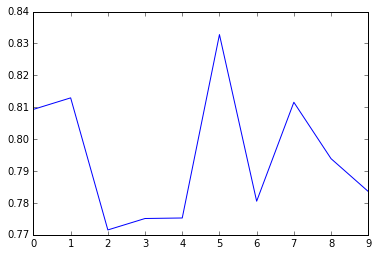

In [128]:

from sklearn.ensemble import AdaBoostClassifier

# from sklearn.naive_bayes import GaussianNB
Ada= AdaBoostClassifier(base_estimator=Rf,n_estimators=2)
# Ada = GaussianNB()
outcomesAda=[]
for train_id, test_id in kf.split(train1,labels):
    X_train, X_test = train1.values[train_id], train1.values[test_id]
    y_train, y_test = labels.values[train_id], labels.values[test_id]
    
    
            #Don't cheat - fit only on training data
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    # apply same transformation to test data
    X_test = scaler.transform(X_test) 
    
    Ada.fit(X_train,y_train)
    
    predictions = Ada.predict_proba(X_test)
    predictions1 = []
    for i in range(len(predictions)):
        if(predictions[i][0]>predictions[i][1]):
            predictions1.append(1-predictions[i][0])
        else:
            predictions1.append(predictions[i][1])
    
#     min_max_scaler = MinMaxScaler(feature_range=(0,1),copy=False)
#     predictions = predictions.reshape(-1,1)
#     predictions = min_max_scaler.fit_transform(predictions)
    
    fpr, tpr, thresholds = roc_curve(y_test, predictions1)
    accuracy = auc(fpr, tpr)
    outcomesAda.append(accuracy)
    
plt.plot(range(10),outcomesAda)
plt.ylabel=('accuracy')
print(np.mean(outcomesAda))

0.775271741317


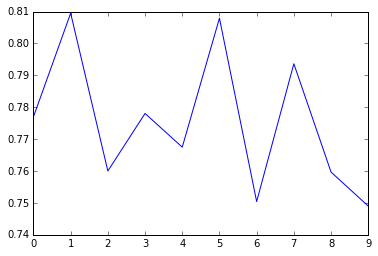

In [126]:
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.neural_network import MLPClassifier
#Nn = MLPClassifier(activation='logistic',solver='sgd', alpha=1e-3,learning_rate='adaptive',
         #           hidden_layer_sizes=(9,9),learning_rate_init=0.02, random_state=123)
Nn = KNeighborsClassifier(n_neighbors=1000, weights='uniform', leaf_size=300, p=1, n_jobs=-1)

outcomesNn=[]

for train_id, test_id in kf.split(train1,labels):

    X_train, X_test = train1.values[train_id], train1.values[test_id]
    y_train, y_test = labels.values[train_id], labels.values[test_id]

        #Don't cheat - fit only on training data
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    # apply same transformation to test data
    X_test = scaler.transform(X_test) 

    Nn.fit(X_train,y_train)
    
    predictions = Nn.predict_proba(X_test)
    predictions1 = []
    for i in range(len(predictions)):
        if(predictions[i][0]>predictions[i][1]):
            predictions1.append(1-predictions[i][0])
        else:
            predictions1.append(predictions[i][1])

#     min_max_scaler = MinMaxScaler(feature_range=(0,1),copy=False)
#     predictions = predictions.reshape(-1,1)
#     predictions = min_max_scaler.fit_transform(predictions)
    
    fpr, tpr, thresholds = roc_curve(y_test, predictions1)
    
    accuracy = auc(fpr, tpr)
    outcomesNn.append(accuracy)
    
plt.plot(range(10),outcomesNn)
plt.ylabel=('accuracy')
print(np.mean(outcomesNn))

In [84]:
predictions

array([[ 0.628,  0.372],
       [ 0.637,  0.363],
       [ 0.724,  0.276],
       ..., 
       [ 0.406,  0.594],
       [ 0.715,  0.285],
       [ 0.355,  0.645]])

0.795465253604


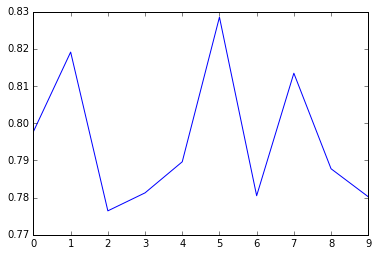

In [129]:
from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators=[
        ('rf', Rf),('dt',dtree),('nn',Ada)],voting='soft')

outcomesVC=[]

for train_id, test_id in kf.split(train1,labels):

    X_train, X_test = train1.values[train_id], train1.values[test_id]
    y_train, y_test = labels.values[train_id], labels.values[test_id]

        # Don't cheat - fit only on training data
    scaler = StandardScaler()  
    scaler.fit(X_train)  
    X_train = scaler.transform(X_train)  
    # apply same transformation to test data
    X_test = scaler.transform(X_test) 

    vc.fit(X_train,y_train)
    
    predictions = vc.predict_proba(X_test)
    predictions1 = []
    for i in range(len(predictions)):
        if(predictions[i][0]>predictions[i][1]):
            predictions1.append(1-predictions[i][0])
        else:
            predictions1.append(predictions[i][1])
    
#     min_max_scaler = MinMaxScaler(feature_range=(0,1),copy=False)
#     predictions = predictions.reshape(-1,1)
#     predictions = min_max_scaler.fit_transform(predictions)

    fpr, tpr, thresholds = roc_curve(y_test, predictions1)
    accuracy = auc(fpr, tpr)
    outcomesVC.append(accuracy)
    
plt.plot(range(10),outcomesVC)
plt.ylabel=('accuracy')
print(np.mean(outcomesVC))

In [130]:
test = pd.read_csv('/home/abhi/Desktop/testData.csv')
test1 = pd.read_csv('/home/abhi/Desktop/testData.csv')

job = pd.get_dummies(test['job'], drop_first = True)
marital = pd.get_dummies(test['marital'],drop_first = True)
education = pd.get_dummies(test['education'], drop_first = True)
default = pd.get_dummies(test['default'], drop_first = True)
housing = pd.get_dummies(test['housing'], drop_first = True)
loan = pd.get_dummies(test['loan'], drop_first = True)
contact = pd.get_dummies(test['contact'], drop_first = True)
month = pd.get_dummies(test['month'], drop_first = True)
day_of_week = pd.get_dummies(test['day_of_week'], drop_first = True)
poutcome = pd.get_dummies(test['poutcome'], drop_first = True)

test.drop(['Id','job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'], axis =1, inplace = True)
test = pd.concat([test,job,marital,education,housing,loan,contact,month],axis = 1)

test.dropna(axis=0, how='all')
# Fare_avg = test['Fare'].mean()
# def impute_Fare(col):    
#     if pd.isnull(col):        
#             return Fare_avg
#     else: return col
# test['Fare'] = test['Fare'].apply(impute_Fare)

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,blue-collar,...,telephone,aug,dec,jul,jun,mar,may,nov,oct,sep
0,48,2,999,0,-1.8,92.893,-46.2,1.266,5099.1,0,...,0,0,0,0,0,0,1,0,0,0
1,37,5,999,0,1.1,93.994,-36.4,4.860,5191.0,1,...,1,0,0,0,0,0,1,0,0,0
2,51,1,999,0,1.4,93.918,-42.7,4.963,5228.1,1,...,0,0,0,1,0,0,0,0,0,0
3,66,3,6,2,-1.7,94.027,-38.3,0.903,4991.6,0,...,0,1,0,0,0,0,0,0,0,0
4,36,2,999,0,1.4,94.465,-41.8,4.865,5228.1,1,...,1,0,0,0,1,0,0,0,0,0
5,25,6,999,1,-1.8,92.893,-46.2,1.313,5099.1,0,...,0,0,0,0,0,0,1,0,0,0
6,41,4,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,0,0,1,0,0,0
7,37,1,999,0,1.1,93.994,-36.4,4.859,5191.0,0,...,1,0,0,0,0,0,1,0,0,0
8,46,3,999,0,-0.1,93.200,-42.0,4.153,5195.8,0,...,0,0,0,0,0,0,0,1,0,0
9,36,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,1,0,0,0,0,0,1,0,0,0


In [131]:
    #Don't cheat - fit only on training data
scaler = StandardScaler()  
scaler.fit(train1)  
train1 = scaler.transform(train1)  
# apply same transformation to test data
test = scaler.transform(test) 

vc.fit(train1,labels)
predictions = vc.predict_proba(test)
predictions1 = []

for i in range(len(predictions)):

        if (predictions[i][0]>predictions[i][1]):
            predictions1.append(1-predictions[i][0])
        else:
            predictions1.append(predictions[i][1])


# min_max_scaler = MinMaxScaler(feature_range=(0,1),copy=False)
# predictions = predictions.reshape(-1,1)
# predictions = min_max_scaler.fit_transform(predictions)

Class=pd.DataFrame(data=predictions1,columns=['Class'])
pred_final=pd.concat([test1['Id'],Class],axis =1)
pred_final.to_csv('Kaggle_pred.csv',index=False)

In [132]:
pred_final.dropna(axis=0, how='all')

,Id,Class
0,1,0.585572
1,2,0.318189
2,3,0.358694
3,4,0.908689
4,5,0.347850
5,6,0.250049
6,7,0.253908
7,8,0.267720
8,9,0.348017
9,10,0.331962
